In [356]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [357]:
dataset = pd.read_excel('Dataset_CreditScoring.xlsx')
dataset.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


In [358]:
dataset.shape

(3000, 30)

In [359]:
dataset.drop('ID', axis=1, inplace=True)
print(dataset.shape)
dataset.head()

(3000, 29)


,TARGET,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,3,3,0,4,0.0,5,117,27,0,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,15,9,0,3,1.0,3,14,14,0,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,0,0,0,1,5.0,1,354,7,0,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,8,5,0,6,1.0,10,16,4,0,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,3,1,0,9,0.0,8,130,52,0,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


In [360]:
dataset.isna().sum()

TARGET               0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64

In [361]:
dataset = dataset.fillna(dataset.median())

In [362]:
def count_labels(labels):
    '''
    Calculates the size of each label

    Args:
        labels (list): Lables 0 and 1 corresponding to non default and default correspondingly
    '''
    ones = sum(labels)
    zeros = len(labels) - ones
    print(f'zeros {zeros},  ones {ones}')

count_labels(dataset['TARGET'].tolist())

zeros 2500,  ones 500


**Splitting the data**

In [363]:
x = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [364]:
# # splitting dataset into training and test (in ratio 80:20)

def data_split(x, y):
    '''
    Splits data into train, validation and test

    Args:
        vectors (np.array): Extracted text in form of vectors
        labels (pd.Series): 0s (Research_restriction) and 1s (Access_restriction)

    Returns:
        train (tuple): Pair of x vectors and y ground truth labels as tuple pairs
        validation (tuple): Pair of x vectors and y ground truth labels as tuple pairs
        test (tuple): Pair of x vectors and y ground truth labels as tuple pairs

    '''

    # Split the data into training, validation, and test sets
    x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y) # allocate 80% of data to trained, the rest to validation and test
    x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=1) # devide the rest to validation and test data


    sc = StandardScaler()

    x_train = sc.fit_transform(x_train)
    x_val = sc.transform(x_val)
    x_test = sc.transform(x_test)

    return (x_train, y_train), (x_val, y_val), (x_test, y_test)

train, val, test = data_split(x, y)
print(train[0].shape, val[0].shape, test[0].shape) # shape of X vectors

(2400, 28) (300, 28) (300, 28)


**Logistic Regression**

In [365]:
def LogisticRegression_Scoring(train, val, test):
    '''
    Trains the Logistic Regression model.
    Prints the model performance with 'Accuracy' and 'F1-score' metrics

    Args:
        train (np.array): train set
        val (np.array): validation set
        test (np.array): test set

    Returns:
        model (class): The trained classification model
    '''
    model_LR = LogisticRegression(random_state=1)

    # Initialize the Random Forest classifier
    model_LR = LogisticRegression(random_state=1)

    # Train the classifier
    model_LR.fit(train[0], train[1]) # tuple[0] = vectors, tuple[1] = integer labels

    # Make predictions on validation set
    yhat_val = model_LR.predict(val[0])

    # Make predictions on test set
    yhat_test = model_LR.predict(test[0])

    # Evaluate the classifier on validation set with metrics "Accuracy" and "F1-score"
    accuracy_val = accuracy_score(val[1], yhat_val)
    f1_val = f1_score(val[1], yhat_val, average='weighted')
    print(f"Validation Accuracy: {accuracy_val}")
    print(f"Validation F1-score: {f1_val}")

    # Evaluate the classifier on test set with metrics "Accuracy" and "F1-score"
    accuracy_test = accuracy_score(test[1], yhat_test)
    f1_test = f1_score(test[1], yhat_test, average='weighted')
    print(f"Test Accuracy: {accuracy_test}")
    print(f"Test F1-score: {f1_test}")


    return model_LR

model_LogisticRegression = LogisticRegression_Scoring(train, val, test)

Validation Accuracy: 0.8633333333333333
Validation F1-score: 0.8345235560692237
Test Accuracy: 0.82
Test F1-score: 0.7823759120337067


**Support Vector Machines**

In [366]:
def SVM_Scoring(train, val, test):
    '''
    Trains the Support Vector Machines model.
    Prints the model performance with 'Accuracy' and 'F1-score' metrics

    Args:
        train (np.array): train set
        val (np.array): validation set
        test (np.array): test set

    Returns:
        model (class): The trained classification model
    '''

    # Initialize the SMV classifier
    model_SVC = SVC(random_state=1)

    # Train the classifier
    model_SVC.fit(train[0], train[1]) # tuple[0] = vectors, tuple[1] = integer labels

    # Make predictions on validation set
    yhat_val = model_SVC.predict(val[0])

    # Make predictions on test set
    yhat_test = model_SVC.predict(test[0])

    # Evaluate the classifier on validation set with metrics "Accuracy" and "F1-score"
    accuracy_val = accuracy_score(val[1], yhat_val)
    f1_val = f1_score(val[1], yhat_val, average='weighted')
    print(f"Validation Accuracy: {accuracy_val}")
    print(f"Validation F1-score: {f1_val}")

    # Evaluate the classifier on test set with metrics "Accuracy" and "F1-score"
    accuracy_test = accuracy_score(test[1], yhat_test)
    f1_test = f1_score(test[1], yhat_test, average='weighted')
    print(f"Test Accuracy: {accuracy_test}")
    print(f"Test F1-score: {f1_test}")


    return model_SVC

model_SVM = SVM_Scoring(train, val, test)

Validation Accuracy: 0.85
Validation F1-score: 0.7928256602096373
Test Accuracy: 0.8133333333333334
Test F1-score: 0.7386096619586886


**Random Forest**

In [367]:
def RandomForest_Scoring(train, val, test):
    '''
    Trains the Random Forest model.
    Prints the model performance with 'Accuracy' and 'F1-score' metrics

    Args:
        train (np.array): train set
        val (np.array): validation set
        test (np.array): test set

    Returns:
        model (class): The trained classification model
    '''

    # Initialize the Random Forest classifier
    model_RF = RandomForestClassifier(random_state=1)

    # Train the classifier
    model_RF.fit(train[0], train[1]) # tuple[0] = vectors, tuple[1] = integer labels

    # Make predictions on validation set
    yhat_val = model_RF.predict(val[0])

    # Make predictions on test set
    yhat_test = model_RF.predict(test[0])

    # Evaluate the classifier on validation set with metrics "Accuracy" and "F1-score"
    accuracy_val = accuracy_score(val[1], yhat_val)
    f1_val = f1_score(val[1], yhat_val, average='weighted')
    print(f"Validation Accuracy: {accuracy_val}")
    print(f"Validation F1-score: {f1_val}\n")

    # Evaluate the classifier on test set with metrics "Accuracy" and "F1-score"
    accuracy_test = accuracy_score(test[1], yhat_test)
    f1_test = f1_score(test[1], yhat_test, average='weighted')
    print(f"Test Accuracy: {accuracy_test}")
    print(f"Test F1-score: {f1_test}")


    return model_RF

model_RandomForest = RandomForest_Scoring(train, val, test)

Validation Accuracy: 0.85
Validation F1-score: 0.8148908173814969

Test Accuracy: 0.8366666666666667
Test F1-score: 0.7908422241512886


**XG Boost**

In [368]:
def XGBoost_Scoring(train_data, val_data, test_data):
    '''
    Trains the XGBoost model.
    Prints the model performance with 'Accuracy' and 'F1-score' metrics

    Args:
        train_data (np.array): train set
        val_data (np.array): validation set
        test_data (np.array): test set

    Returns:
        model (class): The trained classification model
    '''

    # Initialize the XGBoost classifier
    model_XGB = XGBClassifier(random_state=1)

    # Train the classifier
    model_XGB.fit(train_data[0], train_data[1])  # tuple[0] = vectors, tuple[1] = integer labels

    # Make predictions on validation set
    yhat_val = model_XGB.predict(val_data[0])

    # Make predictions on test set
    yhat_test = model_XGB.predict(test_data[0])

    # Evaluate the classifier on validation set with metrics "Accuracy" and "F1-score"
    accuracy_val = accuracy_score(val_data[1], yhat_val)
    f1_val = f1_score(val_data[1], yhat_val, average='weighted')
    print(f"Validation Accuracy: {accuracy_val}")
    print(f"Validation F1-score: {f1_val}\n")

    # Evaluate the classifier on test set with metrics "Accuracy" and "F1-score"
    accuracy_test = accuracy_score(test_data[1], yhat_test)
    f1_test = f1_score(test_data[1], yhat_test, average='weighted')
    print(f"Test Accuracy: {accuracy_test}")
    print(f"Test F1-score: {f1_test}")

    return model_XGB

# Assuming you have train, val, and test datasets defined somewhere before this point
model_XGBoost = XGBoost_Scoring(train, val, test)

Validation Accuracy: 0.8566666666666667
Validation F1-score: 0.8400623019782207

Test Accuracy: 0.8233333333333334
Test F1-score: 0.7966435928542545


**Saving Model**

In [369]:
def save_model(model):
  # Save the model
  joblib.dump(model, './model_RiskScoring.joblib')

**Loading Model**

In [370]:
def load_model(model):
  # Load the model
  model_RiskScoring = joblib.load('./model_RiskScoring.joblib')

**Make predictions**

In [371]:
def make_prediction(input, model):
  # Predictions
  input_ = input # some data
  new_predictions = model.predict(input_)

  print(new_predictions)

**---------------------------------------------------------------------- Neural Networks ------------------------------------------------------------------------**

In [372]:
import torch
import torch.nn as nn
import torch.functional as F
from torch.utils.data import Dataset, Subset, DataLoader

In [373]:
# Defining our dataset custom module
class Scoring_dataset(Dataset):
  '''
  Custom Dataset representing the Scoring data (transactions and etc)
  '''

  def __init__(self, data):
    """
    Initializes Dataset instances.
    Assigns TARGET for y target variable, the rest for x.
    Gets the length of the data

    Args:
        data (pd.DataFrame): Preprocessed pandas DataFrame
    """
    self.x = torch.tensor(data.drop(columns=['TARGET']).values.tolist())
    self.y = torch.tensor(data['TARGET'].values.tolist())
    self.len = len(data)

  def __getitem__(self, index):
    """
    Gets the exact data points (rows) by given index

    Args:
        index (integer): Preprocessed pandas DataFrame
    Returns:
        x (array): Input variable
        y (array): target variable
    """
    return self.x[index], self.y[index]

  def __len__(self):
    """
    Shows length of the data

    Returns:
        len (integer): The length of the data

    """
    return self.len

# Object of the custom dataset
train_cleaned_dataset = Scoring_dataset(dataset)

# Splitting the dataset into train and test subsets
train_size = int(0.8 * len(train_cleaned_dataset))

train_indices = list(range(train_size))
test_indices = list(range(train_size, len(train_cleaned_dataset)))

train = Subset(train_cleaned_dataset, train_indices)
test = Subset(train_cleaned_dataset, test_indices)

# Checking the split
f'train length: {len(train)} | test_length: {len(test)}'

'train length: 2400 | test_length: 600'

**Working with DataLoaders**

In [374]:
train_dataloader = DataLoader(dataset=train, batch_size=256, shuffle=True) # More batch size is a way of avoiding overfitting
test_dataloader = DataLoader(dataset=test, batch_size=64) # Still need batch size. Best practices. For instance with LLMs you will run out of memory otherwise

In [375]:
# ---  Model --- # Dropout regularization term can be omitted while using batch normalization and vice versa according to some resources. In my practice using both gives better result
class Credit_classifier(nn.Module):
    '''
    Custom Module - model
    '''
    # Constructor
    def __init__(self, Layers, drop_probability = 0.2):
        """
        Initializes the model architecture.
        Defines the layers and neurons

        Args:
            Layers (list): List containing the layers and neurons.
            drop_probability (float): The probabily of a neuron to be dropped.
        """
        super(Credit_classifier, self).__init__()
        self.bn = []
        self.drop = nn.Dropout(p = drop_probability)
        self.hidden = nn.ModuleList()
        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            torch.nn.init.kaiming_uniform_(linear.weight, nonlinearity = 'relu')
            self.hidden.append(linear)
            self.bn.append(nn.BatchNorm1d(output_size))

    # Prediction
    def forward(self, x):
        """
        Calls the model and runs input through the DNN layers up until the final classification layer

        Args:
            x (tensor): Input variable
        Returns:
            x (tensor): logits of prediction. The highest value is a class prediciton
        """
        n_layers = len(self.hidden)
        for (layer_index, linear_layer) in zip(range(n_layers), self.hidden):
            if layer_index < n_layers - 1:
                x = torch.relu(self.drop(self.bn[layer_index](linear_layer(x))))
            else:
                x = linear_layer(x)

        return x

# Dimension of input variable
first_input_size = train[0][0].shape[0]
print(f"The size of the input : {first_input_size}")

# Classifier. 1st argument is a list where you can define the neurons. Entry = layer, value = n of neurons
model = Credit_classifier([first_input_size, 5, 7, 5, 2], drop_probability = 0.9)

The size of the input : 28


**Extra - Working with GPU**

In [376]:
'''
Usually  we have to work with robust models and datasets.
To run them and to fit them onto the system's memory, we have to use GPUs. They allow to deal with the space and time complexity - Big O(n) as an example
Though for this project it would be overkill.
'''

def GPU():
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model = model.to(device)

**Training Loop**

In [377]:
# ---  Training loop ---
torch.manual_seed(1) # For getting the same weights initialized each time we run the cell

def train(model, train_dataloader, test_dataloader, criterion, optimizer, epochs):
    '''
    Trains the model by converging the Cost function to 0

    Args:
        model (custom class object): Classifier
        train_dataloader (torch dataloader): Loads train data (batches) saving the memory space
        test_dataloader (torch dataloader): Loads test data (batches) saving the memory space
        criterion (Cross Entropy Loss): Loss function
        optimizer (Adam or SGD): Performs gradient descent and update
        epochs (integer): number of periods the model runs
    '''
    loss_accuracy = {'training_loss' : [], 'validation_accuracy' : []}
    Softmax = nn.Softmax(dim = -1)
    for epoch in range(epochs):
        # Training each epoch
        model.train()
        for x, y in train_dataloader:
            # x = x.to(device) | sending tensors to GPU
            # y = y.to(device) | sending tensors to GPU
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            loss_accuracy['training_loss'].append(loss.detach().item())
            loss.backward()
            optimizer.step()


        # Validating the accuracy
        model.eval()
        correct = 0
        for x, y in test_dataloader:
            yhat = model(x)
            _, label = torch.max(Softmax(yhat), 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(test))
        loss_accuracy['validation_accuracy'].append(accuracy)

    return loss_accuracy

**Defining the Criterion, optimiser and epochs**

In [378]:
'''
We can also define our own loss function. The formula is given below

def criterion(yhat, y):
  out = -1 * torch.mean(y * torch.log(yhat) + (1 - y) * torch.log(1-yhat))
  return out
'''
criterion = torch.nn.CrossEntropyLoss() # Loss Function
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001) # momentum = 0.9 # Gradient Descent
epochs = 27 # n of full walk though the dataset

**Training**

In [379]:
# Start training the model
training_results = train(model, train_dataloader, test_dataloader, criterion, optimizer, epochs)

**Visualization**

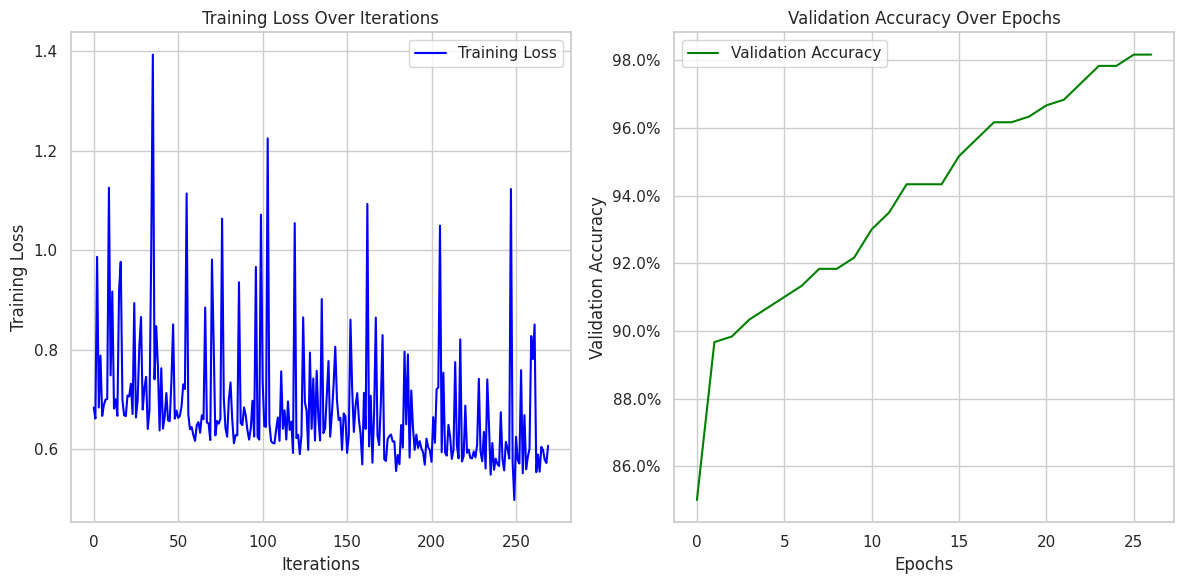

In [380]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter  # Import PercentFormatter

# Set seaborn style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# --- Plotting the training loss ---
plt.subplot(1, 2, 1)
x_axis = range(len(training_results['training_loss']))
plt.plot(x_axis, training_results['training_loss'], label='Training Loss', color='blue')
plt.title('Training Loss Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.legend()

# --- Plotting the validation accuracy ---
plt.subplot(1, 2, 2)
x_axis = range(len(training_results['validation_accuracy']))
plt.plot(x_axis, training_results['validation_accuracy'], label='Validation Accuracy', color='green')
plt.title('Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))  # Format y-axis as percentage
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()